## Stock Price Prediction And Forecasting Using Stacked LSTM


1) Will collect the stock data - apple.
2) Preprocess the data. 
3) Create an Stacked LSTM Model.
4) Predict the test data and plot the output.
5) Predict the future 30 days and plot the output.

In [4]:
import pandas_datareader as pdr

In [3]:
# !pip3 install pandas_datareader

In [ ]:
df = pdr.get_data_tiingo('AAPL', api_key = '')

In [ ]:
df.to_csv('AAPLE.CSV')

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('AAPL.csv')

In [7]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [10]:
# take the close column
df1 = df.reset_index()['close']

In [11]:
df1[1228:]

1228    273.25
1229    287.05
1230    284.43
1231    286.69
1232    282.80
1233    276.93
1234    268.37
1235    276.10
1236    275.03
1237    282.97
1238    283.17
1239    278.58
1240    287.73
1241    293.80
1242    289.07
1243    293.16
1244    297.56
1245    300.63
1246    303.74
1247    310.13
1248    315.01
1249    311.41
1250    307.65
1251    309.54
1252    307.71
1253    314.96
1254    313.14
1255    319.23
1256    316.85
1257    318.89
Name: close, dtype: float64

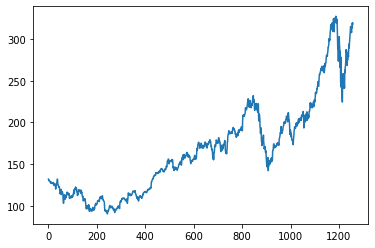

In [12]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [13]:
## LSTM are sensitive to the scale of the data. So we apply MinMax scalar 

In [14]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
df1.shape

(1258, 1)

In [17]:
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [18]:
# Spliting the dataset into train and test
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data , test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [22]:
training_size, test_size

(817, 441)

In [26]:
# Convert an array of values into a dataset matrix

# Dataset -> 120,130,125,140,134,150
# X-train     y-train
# f1  f2  f3  o/p
# 120 130 125 140
# 130 125 140 134
# 125 140 134 150

def create_dataset(dataset, time_step=1):
    dataX,dataY = [],[]
    for i in range(len(dataset) - time_step-1):
        a = dataset[i:(i+time_step),0] # i=0, 0,1,2,3-----99 100
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [27]:
# Reshape into X=t, t+1, t+2, t+3 and Y=t+4
time_step=100
X_train, y_train = create_dataset(train_data, time_step=time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [30]:
X_train[0]

array([0.17607447, 0.17495567, 0.16862282, 0.1696994 , 0.16727181,
       0.16794731, 0.16473866, 0.16174111, 0.1581525 , 0.15654817,
       0.16271215, 0.1614878 , 0.1554927 , 0.15443722, 0.15730811,
       0.15604154, 0.15849025, 0.15308621, 0.15735033, 0.15490163,
       0.15946129, 0.15688592, 0.1537195 , 0.14434687, 0.14812547,
       0.15308621, 0.15241071, 0.15055307, 0.14924428, 0.13607194,
       0.12551718, 0.13906949, 0.14911762, 0.14890653, 0.15401503,
       0.16115005, 0.16583636, 0.17618002, 0.17060711, 0.14725998,
       0.14700667, 0.14422021, 0.13691632, 0.13949168, 0.13784514,
       0.13522756, 0.13071012, 0.11863548, 0.10259225, 0.1058009 ,
       0.10466098, 0.10630752, 0.12403952, 0.09773706, 0.10512539,
       0.10474542, 0.10816516, 0.11323144, 0.11044499, 0.10415435,
       0.09419066, 0.06510175, 0.05395592, 0.0565735 , 0.08169383,
       0.09533058, 0.09689268, 0.09465507, 0.07337668, 0.09288187,
       0.08456472, 0.07992063, 0.09275521, 0.0836359 , 0.09385

In [31]:
X_train[1]

array([0.17495567, 0.16862282, 0.1696994 , 0.16727181, 0.16794731,
       0.16473866, 0.16174111, 0.1581525 , 0.15654817, 0.16271215,
       0.1614878 , 0.1554927 , 0.15443722, 0.15730811, 0.15604154,
       0.15849025, 0.15308621, 0.15735033, 0.15490163, 0.15946129,
       0.15688592, 0.1537195 , 0.14434687, 0.14812547, 0.15308621,
       0.15241071, 0.15055307, 0.14924428, 0.13607194, 0.12551718,
       0.13906949, 0.14911762, 0.14890653, 0.15401503, 0.16115005,
       0.16583636, 0.17618002, 0.17060711, 0.14725998, 0.14700667,
       0.14422021, 0.13691632, 0.13949168, 0.13784514, 0.13522756,
       0.13071012, 0.11863548, 0.10259225, 0.1058009 , 0.10466098,
       0.10630752, 0.12403952, 0.09773706, 0.10512539, 0.10474542,
       0.10816516, 0.11323144, 0.11044499, 0.10415435, 0.09419066,
       0.06510175, 0.05395592, 0.0565735 , 0.08169383, 0.09533058,
       0.09689268, 0.09465507, 0.07337668, 0.09288187, 0.08456472,
       0.07992063, 0.09275521, 0.0836359 , 0.09385291, 0.10077

In [29]:
X_test.shape, y_test.shape

((340, 100), (340,))

In [32]:
X_train.shape,X_train.shape[0], X_train.shape[1]

((716, 100), 716, 100)

In [34]:
# Reshape input to be[Sample, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test =  X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [35]:
# Create LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [39]:
model = Sequential()
## input_shape = (X_train[1],1)
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
# Output layer
model.add(Dense(1))

In [40]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          epochs=20,batch_size=32, verbose=1)

Epoch 1/20


UnknownError:    Fail to find the dnn implementation.
	 [[{{node CudnnRNN}}]]
	 [[sequential_1/lstm_3/PartitionedCall]] [Op:__inference_train_function_9346]

Function call stack:
train_function -> train_function -> train_function


In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [ ]:
# Transform the data back to original form 
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

## Calculate RMSE
import math
from sklearn.metrics import mean_squared_error
print(math.sqrt(mean_squared_error(y_train, train_predict)) )

## Test data RMSE
print(math.sqrt(mean_squared_error(y_test, test_predict)))



In [ ]:
# Plotting 
# Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

#shift test prediction 
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, : ] = test_predict

#Plot baseline and Predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plasma(testPredictPlot)
plt.show()

In [ ]:
# Predict for next 30 days

In [44]:
len(test_data)

441

In [45]:
x_input = test_data[341:].reshape(1,-1)

In [47]:
x_input.shape

(1, 100)

In [48]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [50]:
len(temp_input)

100

In [ ]:
# Next 30 days

lst_output =[]
n_steps = 100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(-1,1)
        x_input = x_input.reshape((1,n_steps,1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} dat output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input= temp_input[1:]
        
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extendtend(yhat.tolist())
        i=i+1
        
print(lst_output)

In [51]:
day_new = np.arange(1,101) 
day_pred = np.arange(101,131) # 30 days future

In [52]:
len(df1)

1258

In [53]:
df3 = df1.tolist()

In [ ]:
df3.extend(lst_output)

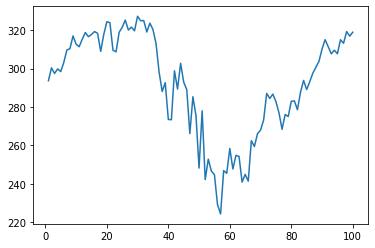

In [54]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-100: ]))


In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-100: ]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

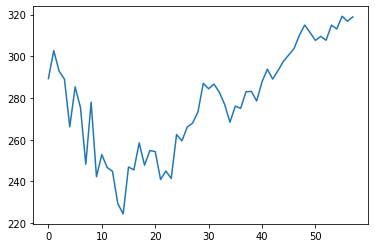

In [57]:
plt.plot(df3[1200:])

In [ ]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])